# Bonus Questions


### Join All The Things
#####  The following questions are related creating basic data tables that Danny and his team can use to quickly deriveinsights without needing to join the underlying tables using SQL .


In [ ]:
create view join_all as (
select b.customer_id , b.order_date , c.product_name , c.price , 
(case 
when b.customer_id = "A" and  b.order_date  >= (select join_date from members  where customer_id = "A") then "Y"
when b.customer_id = "A" and b.order_date  < (select join_date from members where customer_id = "A") then "N"
when b.customer_id = "B" and b.order_date  >= (select join_date from members  where customer_id = "B") then "Y"
when b.customer_id = "B" and b.order_date  < (select join_date from members  where customer_id = "B") then "N"
else NULL end) as members
from sales as b
join menu as  c 
on
b.product_id = c.product_id
)


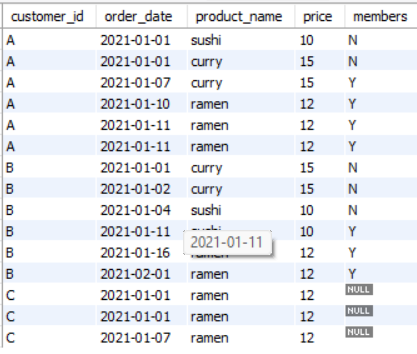

The view "join_all" is created using the "CREATE VIEW" statement. This view will contain the results of the following SELECT query.

##### The SELECT query starts by selecting several columns from the "sales" table (aliased as "b") and the "menu" table (aliased as "c"). These columns include:

- "b.customer_id" (customer ID from the "sales" table).
- "b.order_date" (order date from the "sales" table).
- "c.product_name" (product name from the "menu" table).
- "c.price" (price of the product from the "menu" table).


##### A new column called "members," which is determined based on certain conditions.The "CASE" statement is used to determine the value of the "members" column. It checks several conditions for each row and assigns a value accordingly:

- If the "customer_id" is "A" , and the "order_date" is greater than or equal to the "join_date" associated with the customer, it assigns "Y" (indicating a member).
- If the "customer_id" is "A" and the "order_date" is less than the "join_date" for customer "A," it assigns "N" (indicating not a member).
- If the "customer_id" is "B" and the "order_date" is greater than or equal to the "join_date" for customer "B," it assigns "Y."
- If the "customer_id" is "B" and the "order_date" is less than the "join_date" for customer "B," it assigns "N."
- For any other cases, it assigns NULL to the "members" column.
- The main query uses a JOIN clause to combine data from the "sales" table (aliased as "b") and the "menu" table (aliased as "c") based on the "product_id" column.

### Rank All The Things
##### Danny also requires further information about the ranking of customer products, but he purposely does not need the ranking for non-member purchases so he expects null ranking values for the records when customers are not yet part of the loyalty program.


In [ ]:

create view ranking_all as(
with cte as(
select b.customer_id , b.order_date , c.product_name , c.price , 
(case 
when b.customer_id = "A" and b.order_date  >= (select join_date from members  where customer_id = "A") then "Y"
when b.customer_id = "A" and b.order_date  < (select join_date from members where customer_id = "A") then "N"
when b.customer_id = "B" and b.order_date  >= (select join_date from members  where customer_id = "B") then "Y"
when b.customer_id = "B" and b.order_date  < (select join_date from members  where customer_id = "B") then "N"
else NULL end) as members 
from sales as b
join menu as  c 
on
b.product_id = c.product_id
)
select customer_id, order_date,product_name,price ,members,
(case when members != "N" then rank() over(partition by customer_id,members order by order_date ) else 0 end) as rankings
from cte
)


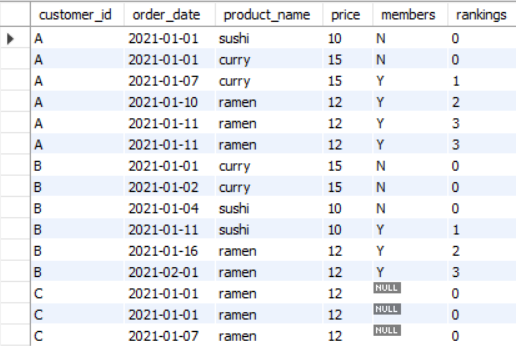

- In the outer SELECT statement, the query retrieves customer_id, order_date, product_name, price, and the "members" column from the CTE "cte." It also calculates the "rankings" column.

- The "rankings" column is calculated using the RANK() window function. It partitions the data by "customer_id" and "members" and orders the rows by "order_date." If the "members" column is not equal to "N," then the ranking is calculated; otherwise, it's set to 0.

# INSIGHTS

From the analysis, we discover a few interesting insights that would be certainly useful for Danny.

- Customer B is the most frequent visitor with 6 visits in Jan 2021.
- Danny’s Diner’s most popular item is ramen, followed by curry and sushi.
- Customer A and C loves ramen whereas Customer B seems to enjoy sushi, curry and ramen equally. Who knows, I might be Customer B!
- Customer A is the 1st member of Danny’s Diner and his first order is curry. Gotta fulfill his curry cravings!
- The last item ordered by Customers A and B before they became members are sushi and curry. Does it mean both of these items are the deciding factor? It must be really delicious for them to sign up as members!
- Before they became members, both Customers A and B spent $25 and $40.
- Throughout Jan 2021, their points for Customer A: 860, Customer B: 940 and Customer C: 360.
- Assuming that members can earn 2x a week from the day they became a member with bonus 2x points for sushi, Customer A has 660 points and Customer B has 340 by the end of Jan 2021.